<a href="https://colab.research.google.com/github/angeruzzi/MachineLearningRef/blob/main/RandomForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forests

Dados de Exemplo: Dados pessoais e de custo médico para previsão de custo de seguro ( https://www.kaggle.com/mirichoi0218/insurance )

Autor: [Alessandro S. Angeruzzi](https://www.linkedin.com/in/alessandroangeruzzi/)

In [2]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


In [3]:
#Base de Dados
fonte = 'https://raw.githubusercontent.com/angeruzzi/Datasource/main/exampleDataInsurance.csv'
dados = pd.read_csv(fonte)

#Transformações
#Variável smoker para 0 e 1
dados['smoker'] = dados['smoker'].map({'yes':1, 'no':0})

#Alterar a escala da variável resposta charges (custo) para mil dólares 
dados['charges'] = dados['charges']/1000

#Faremos as análise utilizando apenas 3 variáveis : charges (custo), bmi (indice de massa corporal) e smoker (fumante)
dados = dados[['bmi', 'smoker', 'charges']]

dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


In [7]:
#Pegando os dados parao o modelo onde será previsto os custos de seguro de saúde baseados nas variáveis BMI (ICM) e SMOKER (fumante)
X = dados[['bmi', 'charges']]
y = dados['smoker']

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Randon Forest')

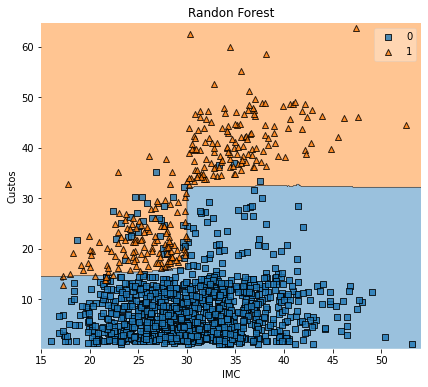

In [12]:
modelo = RandomForestClassifier(n_estimators = 100, max_depth = 4)
modelo.fit(X, y)

plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plot_decision_regions(X.values, y.values, clf = modelo, legend = 1)
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Randon Forest')  